In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import cdt
from cdt.causality.graph import GES
import networkx as nx

import utils.graph_utils
import utils.globals as uglobals

import os

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
def json_to_df(data):
    out = {}
    
    for model_idx, (model, results) in enumerate(data.items()):
        for subject, score in results.items():
            if subject not in out.keys():
                out[subject] = []
            out[subject].append(float(score))
    out = pd.DataFrame(out)
    return out

def make_graph(node_list):
    g = nx.DiGraph()
    
    for s in node_list:
        for e in node_list:
            if e == 'n_params':
                continue
            g.add_edges_from([(s, e)])
    
    return g


def run_ges(exp_name):
    with open(f'{uglobals.AGGREGATED_OUTPUT_DIR}/{exp_name}.json') as f:
        data = json.load(f)

    df = json_to_df(data)
    
    obj = GES()
    out = obj.predict(df_data=df)

    return out


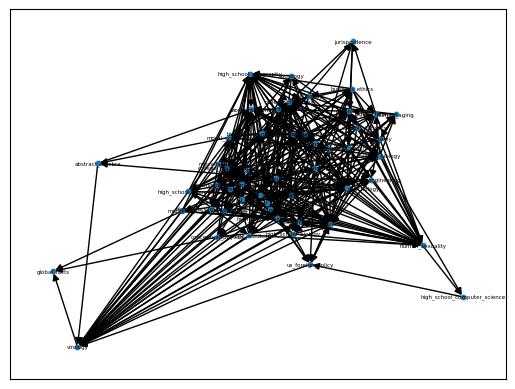

[('abstract_algebra', 'virology'), ('abstract_algebra', 'world_religions'), ('anatomy', 'college_chemistry'), ('anatomy', 'electrical_engineering'), ('anatomy', 'high_school_geography'), ('anatomy', 'high_school_microeconomics'), ('anatomy', 'high_school_psychology'), ('anatomy', 'human_sexuality'), ('anatomy', 'n_params'), ('astronomy', 'college_chemistry'), ('astronomy', 'college_medicine'), ('astronomy', 'high_school_geography'), ('astronomy', 'high_school_mathematics'), ('astronomy', 'high_school_microeconomics'), ('astronomy', 'human_sexuality'), ('astronomy', 'marketing'), ('astronomy', 'us_foreign_policy'), ('astronomy', 'n_params'), ('business_ethics', 'anatomy'), ('business_ethics', 'astronomy'), ('business_ethics', 'college_chemistry'), ('business_ethics', 'high_school_geography'), ('business_ethics', 'high_school_psychology'), ('business_ethics', 'human_sexuality'), ('business_ethics', 'logical_fallacies'), ('business_ethics', 'miscellaneous'), ('business_ethics', 'philosoph

In [3]:
# Draw overall output
name = 'aggregated_5shot_spec_continuous'
out = run_ges(name)

nx.draw_networkx(out, node_size=10, font_size=4)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(out.edges)
print(len(out.edges))

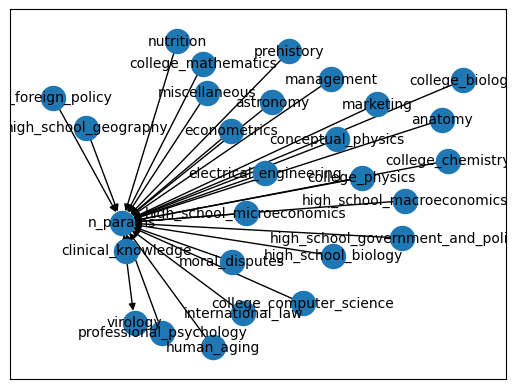

[('abstract_algebra', 'virology'), ('abstract_algebra', 'world_religions'), ('anatomy', 'college_chemistry'), ('anatomy', 'electrical_engineering'), ('anatomy', 'high_school_geography'), ('anatomy', 'high_school_microeconomics'), ('anatomy', 'high_school_psychology'), ('anatomy', 'human_sexuality'), ('anatomy', 'n_params'), ('astronomy', 'college_chemistry'), ('astronomy', 'college_medicine'), ('astronomy', 'high_school_geography'), ('astronomy', 'high_school_mathematics'), ('astronomy', 'high_school_microeconomics'), ('astronomy', 'human_sexuality'), ('astronomy', 'marketing'), ('astronomy', 'us_foreign_policy'), ('astronomy', 'n_params'), ('business_ethics', 'anatomy'), ('business_ethics', 'astronomy'), ('business_ethics', 'college_chemistry'), ('business_ethics', 'high_school_geography'), ('business_ethics', 'high_school_psychology'), ('business_ethics', 'human_sexuality'), ('business_ethics', 'logical_fallacies'), ('business_ethics', 'miscellaneous'), ('business_ethics', 'philosoph

In [14]:
# All edgs involving the n_params node
out_copy = out.copy()

to_remove = []
for node in out_copy.nodes:
    if node == 'n_params':
        continue
    if not((node, 'n_params') in out_copy.edges or ('n_params', node) in out_copy.edges):
        to_remove.append(node)
out_copy.remove_nodes_from(to_remove)

to_remove = []
for edge in out_copy.edges:
    if 'n_params' not in edge:
        to_remove.append(edge)
out_copy.remove_edges_from(to_remove)

nx.draw_networkx(out_copy, font_size=10)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}_nparams', dpi=1000)
plt.show()
print(out.edges)
print(len(out))

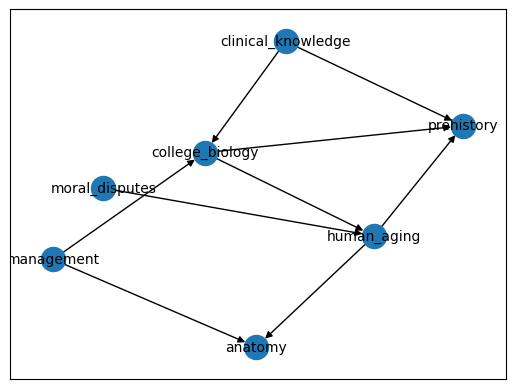

In [23]:
# Filter nodes
out_copy = out.copy()
out_copy_copy = out.copy()

nodes_to_cover = ['anatomy', 'moral_disputes', 'human_aging', 'management', 'college_biology', 
                  'prehistory', 'clinical_knowledge']

out_copy_copy.remove_nodes_from(nodes_to_cover)
out_copy.remove_nodes_from(out_copy_copy.nodes)

nx.draw_networkx(out_copy, font_size=10, pos=nx.drawing.layout.kamada_kawai_layout(out_copy))
plt.savefig(f'{uglobals.FIGS_DIR}/{name}_sub1', dpi=1000)
plt.show()

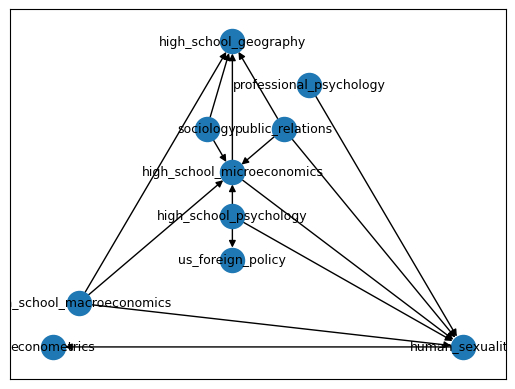

{'econometrics': array([-0.77777778, -0.36666667]),
 'high_school_geography': array([0.        , 0.41111111]),
 'high_school_macroeconomics': array([-0.66666667, -0.25555556]),
 'high_school_microeconomics': array([0.        , 0.07777778]),
 'high_school_psychology': array([ 0.        , -0.03333333]),
 'human_sexuality': array([ 1.        , -0.36666667]),
 'professional_psychology': array([0.33333333, 0.3       ]),
 'public_relations': array([0.22222222, 0.18888889]),
 'sociology': array([-0.11111111,  0.18888889]),
 'us_foreign_policy': array([ 0.        , -0.14444444])}

In [21]:
# Filter nodes
out_copy = out.copy()
out_copy_copy = out.copy()

nodes_to_cover = [
    'Econometrics',
    'High School Geography',
    'High School Gov’t and Politics',
    'High School Macroeconomics',
    'High School Microeconomics',
    'High School Psychology',
    'Human Sexuality',
    'Professional Psychology',
    'Public Relations',
    'Security Studies',
    'Sociology',
    'US Foreign Policy'
]
for i, val in enumerate(nodes_to_cover):
    nodes_to_cover[i] = val.lower().replace(' ', '_')

out_copy_copy.remove_nodes_from(nodes_to_cover)
out_copy.remove_nodes_from(out_copy_copy.nodes)

scale = 0.5
pos = nx.drawing.layout.planar_layout(out_copy)
for key, val in pos.items():
    pos[key] *= scale

nx.draw_networkx(out_copy, font_size=9, pos=pos)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}_sub2', dpi=1000)
plt.show()
nx.drawing.layout.planar_layout(out_copy)

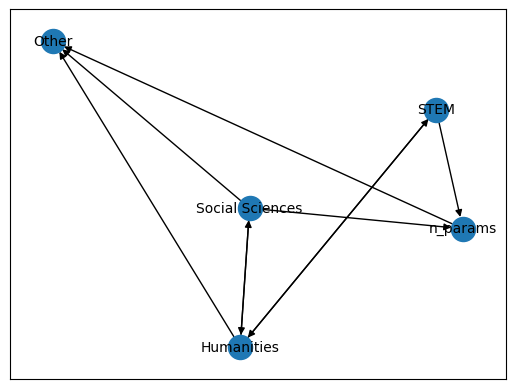

[('STEM', 'Humanities'), ('STEM', 'n_params'), ('Social Sciences', 'Other'), ('Social Sciences', 'Humanities'), ('Social Sciences', 'n_params'), ('Humanities', 'STEM'), ('Humanities', 'Other'), ('Humanities', 'Social Sciences'), ('n_params', 'Other')]
5


In [22]:
# Draw grouped output
name = 'aggregated_5shot_grouped_spec_continuous'
group_out = run_ges(name)

nx.draw_networkx(group_out, font_size=10)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(group_out.edges)
print(len(group_out))